In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

<h1><u>Q1 - Test Data</u></h1>

In [45]:
df = pd.read_csv("Test_Data (2).txt", sep='\t')
df=df.drop("ID",axis=1)
df.head()

,Country,Illumination,road_type,severity,Driver_name
0,France,Day,Urban,Medium,Ringo
1,US,Night,Country,Medium,Paul
2,Germany,Night,Urban,Minor,Paul
3,UK,Night,Country,Major,Ringo
4,Italy,Day,Urban,critical,George


In [46]:
df.severity.value_counts()

Medium      789
major       611
Minor       359
critical    344
Critical     80
Major        56
Name: severity, dtype: int64

In [47]:
df['severity']=df.severity.replace({'major':"Major","critical":"Critical"})
df['severity']=df.severity.replace({'Major':"High","Critical":"High"})
df.severity.value_counts()

High      1091
Medium     789
Minor      359
Name: severity, dtype: int64

In [48]:
cross_driver=pd.crosstab(df['severity'], df['Driver_name'], rownames=['severity'], colnames=['Driver_name'])
cross_driver

Driver_name,George,John,Paul,Ringo
severity,,,,
High,268,249,245,329
Medium,170,197,192,230
Minor,122,114,123,0


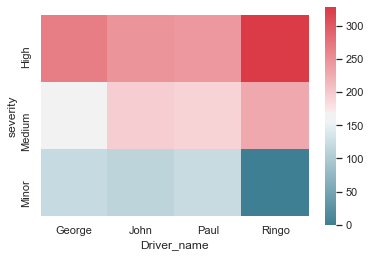

In [49]:
sns.heatmap(cross_driver, annot=False,mask=np.zeros_like(cross_driver, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

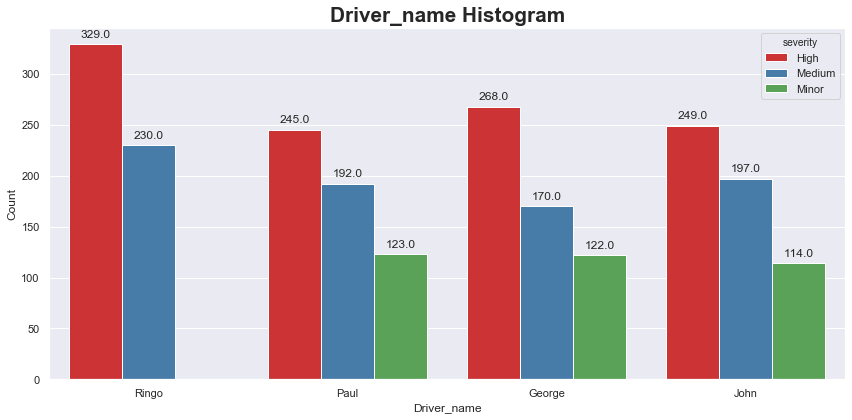

In [50]:
plt.figure(figsize=(12, 6))
splot=sns.countplot(x="Driver_name",hue_order = ['High', 'Medium', 'Minor'], hue="severity",data=df,palette="Set1")
plt.title("Driver_name Histogram",fontsize='xx-large', fontweight='bold')
plt.ylabel("Count")
plt.xlabel("Driver_name")
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [51]:
cross_road=pd.crosstab(df['severity'], df['road_type'], rownames=['severity'], colnames=['road_type'])
cross_road

road_type,Country,Highway,Urban
severity,,,
High,343,353,395
Medium,218,209,362
Minor,125,129,105


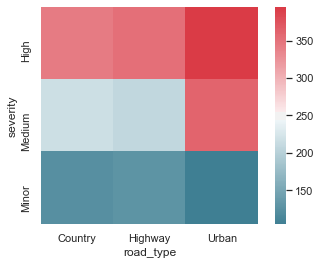

In [52]:
sns.heatmap(cross_road, annot=False,mask=np.zeros_like(cross_road, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

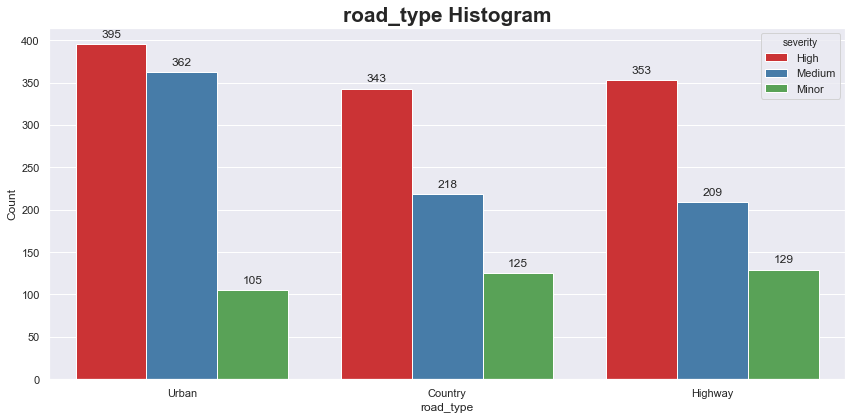

In [53]:
plt.figure(figsize=(12, 6))
splot=sns.countplot(x="road_type",hue_order = ['High', 'Medium', 'Minor'], hue="severity",data=df,palette="Set1")
plt.title("road_type Histogram",fontsize='xx-large', fontweight='bold')
plt.ylabel("Count")
plt.xlabel("road_type")
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [54]:
cross_country=pd.crosstab(df['severity'], df['Country'], rownames=['severity'], colnames=['Country'])
cross_country

Country,France,Germany,Italy,Sweden,UK,US
severity,,,,,,
High,158,165,295,157,150,166
Medium,154,132,73,140,154,136
Minor,61,77,5,76,69,71


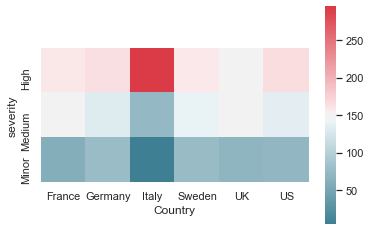

In [55]:
sns.heatmap(cross_country, annot=False,mask=np.zeros_like(cross_country, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

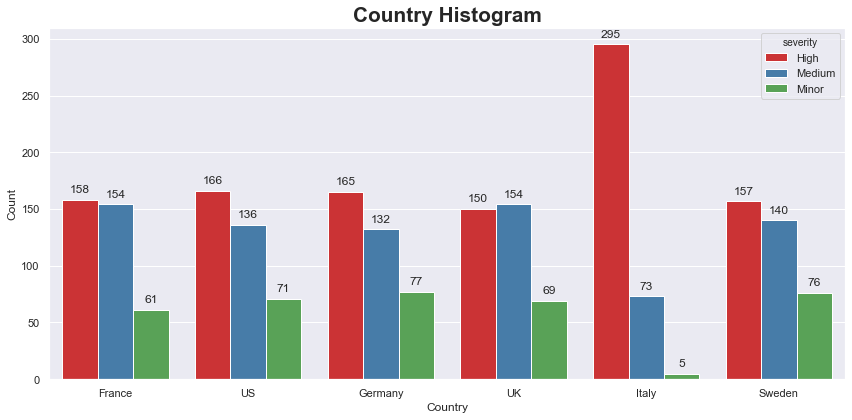

In [56]:
plt.figure(figsize=(12, 6))
splot=sns.countplot(x="Country",hue_order = ['High', 'Medium', 'Minor'], hue="severity",data=df,palette="Set1")
plt.title("Country Histogram",fontsize='xx-large', fontweight='bold')
plt.ylabel("Count")
plt.xlabel("Country")
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [57]:
cross_light=pd.crosstab(df['severity'], df['Illumination'], rownames=['severity'], colnames=['Illumination'])
cross_light

Illumination,Day,Dusk,Night
severity,,,
High,457,98,536
Medium,422,32,335
Minor,116,121,122


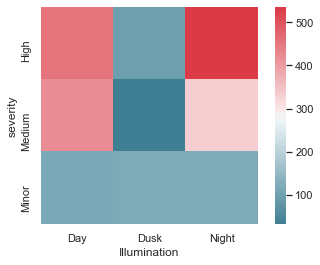

In [58]:
sns.heatmap(cross_light, annot=False,mask=np.zeros_like(cross_light, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True)

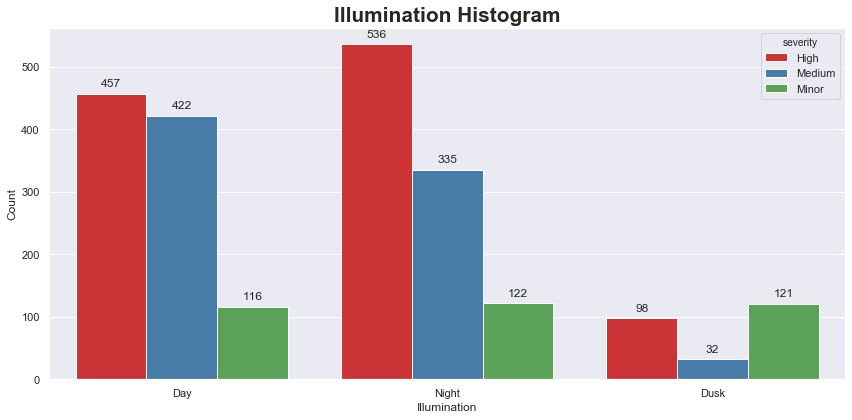

In [59]:
plt.figure(figsize=(12, 6))
splot=sns.countplot(x="Illumination",hue_order = ['High', 'Medium', 'Minor'], hue="severity",data=df,palette="Set1")
plt.title("Illumination Histogram",fontsize='xx-large', fontweight='bold')
plt.ylabel("Count")
plt.xlabel("Illumination")
plt.tight_layout()
for p in splot.patches:
    splot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<h1><u>Q2 - Sensor </u></h1>

In [60]:
df = pd.read_csv("sensor (2).txt", sep='\t')
df.head()

,Series1,Series2,Series3,real_measure
0,0.007782,-0.456367,2.352182,2.47
1,2.738273,2.619737,2.505987,2.47
2,4.144261,3.449640,2.547482,2.47
3,0.058901,0.235777,2.386789,2.47
4,2.646718,2.573619,2.503681,2.47


In [61]:
df_signal=df.rename(columns={"Series1": "Signal1", "Series2": "Signal2","Series3": "Signal3"}).drop("real_measure",axis=1)
df_signal.head()

,Signal1,Signal2,Signal3
0,0.007782,-0.456367,2.352182
1,2.738273,2.619737,2.505987
2,4.144261,3.449640,2.547482
3,0.058901,0.235777,2.386789
4,2.646718,2.573619,2.503681


In [62]:
df_noise=df.real_measure[0]-df
df_noise=df_noise.drop("real_measure",axis=1)
df_noise=df_noise.rename(columns={"Series1": "Noise1", "Series2": "Noise2","Series3": "Noise3"})
df_noise.head()

,Noise1,Noise2,Noise3
0,2.462218,2.926367,0.117818
1,-0.268273,-0.149737,-0.035987
2,-1.674261,-0.979640,-0.077482
3,2.411099,2.234223,0.083211
4,-0.176718,-0.103619,-0.033681


In [63]:
SS_Noise1=sum(map(lambda i : i * i, df_noise.Noise1))
SS_Noise2=sum(map(lambda i : i * i, df_noise.Noise2)) 
SS_Noise3=sum(map(lambda i : i * i, df_noise.Noise3))
SS_Signal1=sum(map(lambda i : i * i, df_signal.Signal1))
SS_Signal2=sum(map(lambda i : i * i, df_signal.Signal2)) 
SS_Signal3=sum(map(lambda i : i * i, df_signal.Signal3))

In [64]:
RMS_signal1=np.sqrt(SS_Signal1/len(df_signal.Signal1))
RMS_signal2=np.sqrt(SS_Signal2/len(df_signal.Signal2))
RMS_signal3=np.sqrt(SS_Signal3/len(df_signal.Signal3))

RMS_noise1=np.sqrt(SS_Noise1/len(df_noise.Noise1))
RMS_noise2=np.sqrt(SS_Noise2/len(df_noise.Noise2))
RMS_noise3=np.sqrt(SS_Noise3/len(df_noise.Noise3))

In [65]:
dB1=round(20*np.log10(RMS_signal1/RMS_noise1),2)
dB2=round(20*np.log10(RMS_signal2/RMS_noise2),2)
dB3=round(20*np.log10(RMS_signal3/RMS_noise3),2)

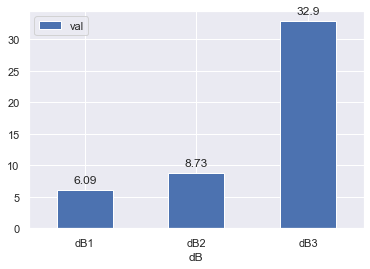

In [79]:
df_plot=pd.DataFrame({'dB':['dB1', 'dB2', 'dB3'], 'val':[dB1, dB2, dB3]}).plot.bar(x='dB', y='val', rot=0)
for p in df_plot.patches:
    df_plot.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

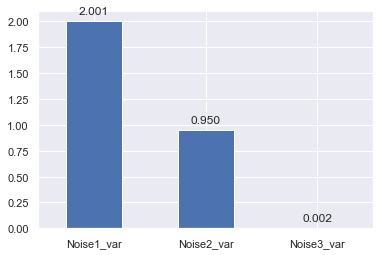

In [83]:
df_plot=df_noise.rename(columns={"Noise1": "Noise1_var", "Noise2": "Noise2_var","Noise3": "Noise3_var"}).var().plot.bar(rot=0)
for p in df_plot.patches:
    df_plot.annotate(format(p.get_height(),'.3f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [68]:
df_signal.describe()

,Signal1,Signal2,Signal3
count,1000.000000,1000.000000,1000.000000
mean,2.474553,2.477194,2.498860
std,1.414456,0.974731,0.048737
min,0.004578,-0.616438,2.344178
25%,1.319582,1.868683,2.468434
50%,2.473678,2.486803,2.499340
75%,3.683775,3.133373,2.531669
max,4.986419,5.280216,2.639011


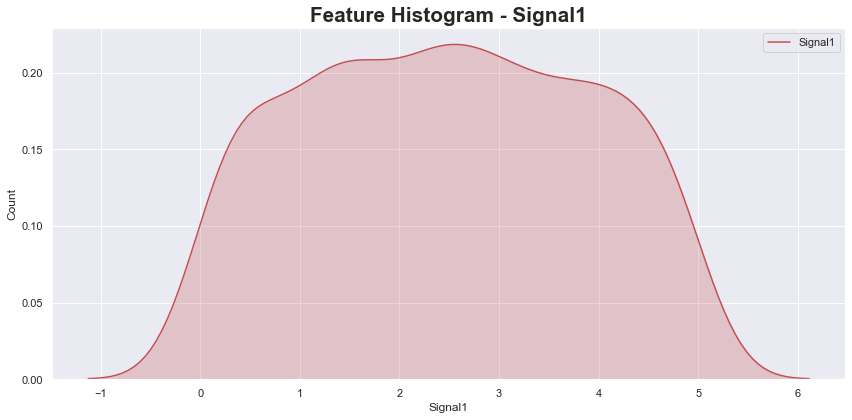

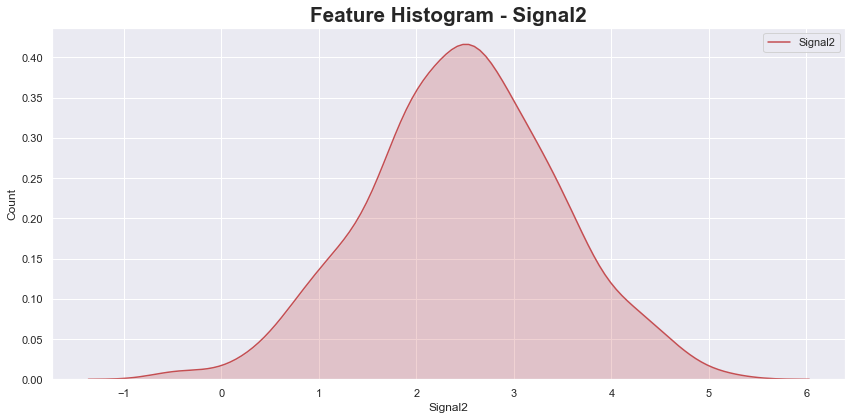

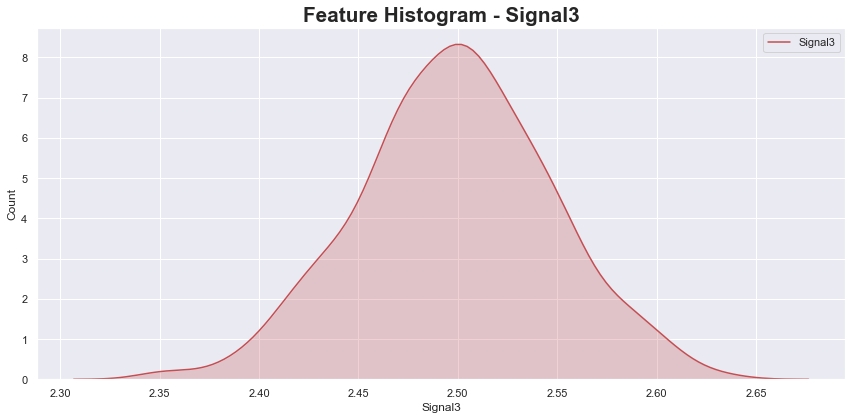

In [69]:
for feature in df_signal.columns:
#devide for economic 
    plt.figure(figsize=(12, 6))
    sns.kdeplot(df_signal[feature],color="r", shade=True, shade_lowest=False)
    plt.title("Feature Histogram - " + feature,fontsize='xx-large', fontweight='bold')
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.tight_layout()

In [70]:
(df_signal.iloc[:,1:]**2).sum(1).pow(1/2)

0      2.396045
1      3.625327
2      4.288319
3      2.398406
4      3.590534
         ...   
995    4.188116
996    5.118644
997    3.500705
998    3.992055
999    3.660272
Length: 1000, dtype: float64

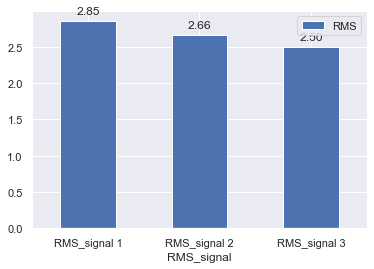

In [85]:
df_plot=pd.DataFrame({'RMS_signal':['RMS_signal 1', 'RMS_signal 2', 'RMS_signal 3'], 'RMS':[RMS_signal1, RMS_signal2, RMS_signal3]}).plot.bar(x='RMS_signal', y='RMS', rot=0)
for p in df_plot.patches:
    df_plot.annotate(format(p.get_height(),'.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

<h1><u>Q3 - Parser</u></h1>

In [72]:
my_list=[]
f = open("parser.log", "r")
readline=f.readlines()
for line in readline:
    my_list.append(line.replace('7D 5D','7D').replace('7D 5E','7E').strip().split())

In [73]:
df=pd.DataFrame(my_list)
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,7E,40,51,00,CB,71,FA,1F,CC,FE,...,39,01,00,00,00,00,00,00,F6,7E
1,7E,40,51,00,C6,71,01,10,CC,FE,...,39,01,00,00,00,00,00,00,03,7E
2,7E,40,51,00,C6,71,05,10,8C,FE,...,39,01,00,00,00,00,00,00,3F,7E
3,7E,40,51,00,C4,71,08,10,8C,FE,...,39,01,00,00,00,00,00,00,3E,7E
4,7E,40,51,00,C2,71,06,10,5C,FE,...,39,01,00,00,00,00,00,00,72,7E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,7E,40,51,00,00,70,00,10,8C,FD,...,50,03,00,00,00,00,00,00,F3,7E
347,7E,40,51,00,00,70,00,10,8C,FD,...,50,03,00,00,00,00,00,00,F3,7E
348,7E,40,51,00,00,70,00,10,8C,FD,...,50,03,00,00,00,00,00,00,F3,7E
349,7E,40,51,00,00,70,00,10,8C,FD,...,50,03,00,00,00,00,00,00,F3,7E


In [74]:
print("Total NaN rows = " + str(sum(df.isna().sum())))

Total NaN rows = 0


In [75]:
df=df.apply(lambda x: x.astype(str).map(lambda x: int(x, base=16)))
df.columns=["row_"+str(name) for name in range(1,23)]

df=df.drop(["row_"+str(name) for name in range(1,9)],axis=1)
df=df.drop(["row_21","row_22"],axis=1)

Inside the Data stream the speed is from the 9th bit to the 20th (including). The data is in little endian.

In [76]:
df = df.loc[:, (df != 0).any(axis=0)]*0.1
df

,row_1,row_2,row_3,row_5,row_6,row_7,row_8,row_9,row_10,row_11,row_13,row_14,row_21,row_22
0,12.6,6.4,8.1,20.3,11.3,25.0,3.1,20.4,25.4,3.1,5.7,0.1,24.6,12.6
1,12.6,6.4,8.1,19.8,11.3,0.1,1.6,20.4,25.4,3.1,5.7,0.1,0.3,12.6
2,12.6,6.4,8.1,19.8,11.3,0.5,1.6,14.0,25.4,3.1,5.7,0.1,6.3,12.6
3,12.6,6.4,8.1,19.6,11.3,0.8,1.6,14.0,25.4,3.1,5.7,0.1,6.2,12.6
4,12.6,6.4,8.1,19.4,11.3,0.6,1.6,9.2,25.4,3.1,5.7,0.1,11.4,12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,12.6,6.4,8.1,0.0,11.2,0.0,1.6,14.0,25.3,3.1,8.0,0.3,24.3,12.6
347,12.6,6.4,8.1,0.0,11.2,0.0,1.6,14.0,25.3,3.1,8.0,0.3,24.3,12.6
348,12.6,6.4,8.1,0.0,11.2,0.0,1.6,14.0,25.3,3.1,8.0,0.3,24.3,12.6
349,12.6,6.4,8.1,0.0,11.2,0.0,1.6,14.0,25.3,3.1,8.0,0.3,24.3,12.6


In [77]:
df.describe()

,row_1,row_2,row_3,row_5,row_6,row_7,row_8,row_9,row_10,row_11,row_13,row_14,row_21,row_22
count,3.510000e+02,3.510000e+02,3.510000e+02,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,3.510000e+02
mean,1.260000e+01,6.400000e+00,8.100000e+00,7.130484,11.226781,8.986895,2.129915,13.940741,23.027920,2.963248,6.723647,0.211111,14.527066,1.260000e+01
std,3.379896e-14,4.180398e-14,5.158789e-14,7.909727,0.044345,12.065919,0.718005,6.980800,7.278357,0.432388,1.018421,0.099523,7.409749,3.379896e-14
min,1.260000e+01,6.400000e+00,8.100000e+00,0.000000,11.200000,0.000000,1.600000,1.200000,0.000000,1.600000,5.700000,0.100000,0.100000,1.260000e+01
25%,1.260000e+01,6.400000e+00,8.100000e+00,0.000000,11.200000,0.000000,1.600000,7.600000,25.300000,3.100000,5.800000,0.100000,7.350000,1.260000e+01
50%,1.260000e+01,6.400000e+00,8.100000e+00,3.800000,11.200000,0.100000,1.600000,17.200000,25.300000,3.100000,6.100000,0.300000,16.200000,1.260000e+01
75%,1.260000e+01,6.400000e+00,8.100000e+00,14.000000,11.300000,25.200000,3.100000,17.200000,25.300000,3.100000,8.000000,0.300000,21.100000,1.260000e+01
max,1.260000e+01,6.400000e+00,8.100000e+00,25.400000,11.300000,25.500000,3.100000,25.200000,25.500000,3.100000,8.200000,0.300000,25.500000,1.260000e+01
